In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013/fer2013/fer2013.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013/fer2013/fer2013.bib
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013/fer2013/README


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013/fer2013/fer2013.csv')

width, height = 48, 48

datapoints = data['pixels'].tolist()
ex_processed=0
#Generating training examples from th input data
X = []
for xseq in datapoints:
    if(ex_processed%10000 ==0):
        print("Processed  "+ str(ex_processed) + " Training Examples ")
    temp = [int(xp) for xp in xseq.split(' ')]
    temp = np.asarray(temp).reshape(width, height)
    X.append(temp.astype('float32'))
    ex_processed+=1

X = np.asarray(X)
X = np.expand_dims(X, -1)

#getting labels for training
y = pd.get_dummies(data['emotion']).as_matrix()

#stats

print("Preprocessing Done")
print("Number of Features: "+str(len(X[0])))
print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))


Processed  0 Training Examples 
Processed  10000 Training Examples 
Processed  20000 Training Examples 
Processed  30000 Training Examples 
Preprocessing Done
Number of Features: 48
Number of Labels: 7
Number of examples in dataset:35887
X,y stored in fdataX.npy and flabels.npy respectively


In [7]:
# important data preprocessing
X=X/255.00

In [13]:
#defining the model
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(48,48,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(7, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 128)       640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        32832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [16]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
History = model.fit(X,y,epochs=50,validation_split=0.3,verbose=1)

Train on 25120 samples, validate on 10767 samples
Epoch 1/50
25120/25120 [==============================] - 6s 240us/sample - loss: 0.4692 - acc: 0.8262 - val_loss: 2.9436 - val_acc: 0.4925
Epoch 2/50
25120/25120 [==============================] - 6s 228us/sample - loss: 0.4513 - acc: 0.8335 - val_loss: 2.9316 - val_acc: 0.4958
Epoch 3/50
25120/25120 [==============================] - 6s 229us/sample - loss: 0.4444 - acc: 0.8357 - val_loss: 3.0466 - val_acc: 0.4945
Epoch 4/50
25120/25120 [==============================] - 6s 232us/sample - loss: 0.4378 - acc: 0.8386 - val_loss: 2.9989 - val_acc: 0.4922
Epoch 5/50
25120/25120 [==============================] - 6s 230us/sample - loss: 0.4425 - acc: 0.8355 - val_loss: 3.0477 - val_acc: 0.4924
Epoch 6/50
25120/25120 [==============================] - 6s 229us/sample - loss: 0.4383 - acc: 0.8367 - val_loss: 3.1072 - val_acc: 0.4851
Epoch 7/50
25120/25120 [==============================] - 6s 227us/sample - loss: 0.4422 - acc: 0.8339 - val_l

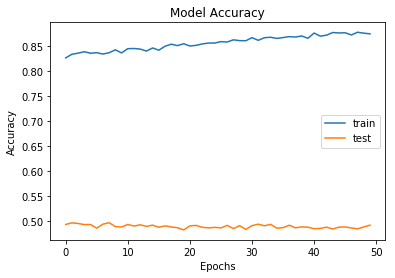

In [17]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.save('my_model.h5') 